# **Multi-Linear Regression, Polynomial Regression and Simple Logistic Regression**


**Linear and Multi-linear regression.**

In [ ]:
# Dataset link
# https://raw.githubusercontent.com/akmalatnamal/davlab8/main/Advertising.csv


Advertising.csv is a advertisement dataset of expenditure on different advertisement channels and sales based on thos advertisements.

There are three predictor variables and one response variable. Identify the response variable, explore the dataset and start working on questions asked below. 

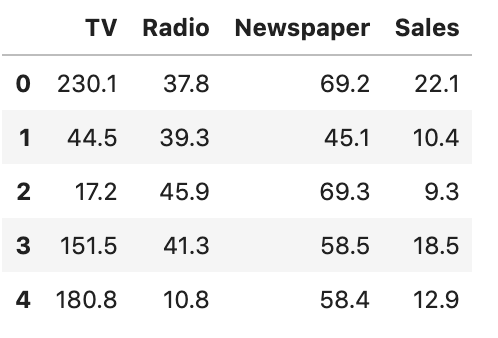

In [ ]:
import pandas as pd
df_adv = pd.read_csv('https://raw.githubusercontent.com/akmalatnamal/davlab8/main/Advertising.csv')
df_adv.head(2)


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


Read the file Advertisement.csv as a dataframe.

For each instance of the predictor combination, form a regression model. For example, if you have 2 predictors,  A and B, you will end up getting 3 models - one with only A, one with only B, and one with both A and B.

Split the data into train and test sets with random_state of 111. Try different random states i.e., 44, 21 and 72 etc.

Compute the MSE of each model.

Print the Predictor - MSE value pair as per following table.

In [ ]:
# +------------------------------+-------------------+
# |          Predictors          |        MSE        |
# +------------------------------+-------------------+
# |            ['TV']            | 10.18618193453022 |
# |          ['Radio']           | 24.23723303713214 |
# |        ['Newspaper']         | 32.13714634300907 |
# |       ['TV', 'Radio']        | 4.391429763581883 |
# |     ['TV', 'Newspaper']      | 8.687682675690592 |
# |    ['Radio', 'Newspaper']    | 24.78339548293816 |
# | ['TV', 'Radio', 'Newspaper'] | 4.402118291449686 |
# +------------------------------+-------------------+

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
import numpy as np

In [ ]:
all_mse = []

In [ ]:
x= df_adv['TV'].values.reshape(-1,1)
y= df_adv['Sales'].values.reshape(-1,1)
lreg = LinearRegression()
lreg.fit(x , y)
y_pred = lreg.predict(x)
all_mse.append(mean_squared_error(y, y_pred))


x= df_adv['Radio'].values.reshape(-1,1)
y= df_adv['Sales'].values.reshape(-1,1)
lreg = LinearRegression()
lreg.fit(x , y)
y_pred = lreg.predict(x)
all_mse.append(mean_squared_error(y, y_pred))

x= df_adv['Newspaper'].values.reshape(-1,1)
y= df_adv['Sales'].values.reshape(-1,1)
lreg = LinearRegression()
lreg.fit(x , y)
y_pred = lreg.predict(x)
all_mse.append(mean_squared_error(y, y_pred))


x= df_adv[['TV', 'Radio']]
y= df_adv['Sales'].values.reshape(-1,1)
lreg = LinearRegression()
lreg.fit(x , y)
y_pred = lreg.predict(x)
all_mse.append(mean_squared_error(y, y_pred))



x= df_adv[['TV', 'Newspaper']]
y= df_adv['Sales'].values.reshape(-1,1)
lreg = LinearRegression()
lreg.fit(x , y)
y_pred = lreg.predict(x)
all_mse.append(mean_squared_error(y, y_pred))


x= df_adv[['Radio', 'Newspaper']]
y= df_adv['Sales'].values.reshape(-1,1)
lreg = LinearRegression()
lreg.fit(x , y)
y_pred = lreg.predict(x)
all_mse.append(mean_squared_error(y, y_pred))


x= df_adv[['TV', 'Radio', 'Newspaper']]
y= df_adv['Sales'].values.reshape(-1,1)
lreg = LinearRegression()
lreg.fit(x , y)
y_pred = lreg.predict(x)
all_mse.append(mean_squared_error(y, y_pred))


In [ ]:
from prettytable import PrettyTable
pt = PrettyTable()
pt.field_names = ['Predictors', 'MSE']
pt.add_row(['TV', all_mse[0]])
pt.add_row(['Radio', all_mse[1]])
pt.add_row(['Newspaper', all_mse[2]])
pt.add_row([['TV','Radio'], all_mse[3]])
pt.add_row([['TV', 'Newspaper'], all_mse[4]])
pt.add_row([['Radio', 'Newspaper'], all_mse[5]])
pt.add_row([['TV', 'Radio', 'Newspaper'], all_mse[6]])

print(pt)

+------------------------------+--------------------+
|          Predictors          |        MSE         |
+------------------------------+--------------------+
|              TV              | 10.512652915656757 |
|            Radio             | 18.09239774512544  |
|          Newspaper           | 25.674022720559698 |
|       ['TV', 'Radio']        | 2.784569900338091  |
|     ['TV', 'Newspaper']      |  9.59280905948414  |
|    ['Radio', 'Newspaper']    | 18.074176393224953 |
| ['TV', 'Radio', 'Newspaper'] | 2.784126314510936  |
+------------------------------+--------------------+


In [ ]:
x= df_adv[['TV', 'Radio']]
y= df_adv['Sales']
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size = 0.8, random_state = 21)
lreg = LinearRegression()
mse = cross_validate(lreg, x, y, scoring = 'neg_mean_squared_error', cv = 5, return_train_score= True)
mse.keys()
print('Cross Validate Test MSE: ', (-1 * np.mean(mse['test_score'])))
print('Cross Validate Train MSE: ', (-1 * np.mean(mse['train_score'])))

Cross Validate Test MSE:  3.011640691152608
Cross Validate Train MSE:  2.7601692827072504


**Polynomial regression.**

In [ ]:
# https://raw.githubusercontent.com/akmalatnamal/davlab8/main/poly.csv
# Dataset for Polynomial Regression


Read the poly.csv file into a dataframe.

Split the data into train and test subsets.

Fit a linear regression model on the entire data, using LinearRegression() object from Sklearn library.

Guesstimate the degree of the polynomial which would best fit the data.

Fit a polynomial regression model on the computed Polynomial Features using LinearRegression( ) object from sklearn library.

Plot the linear and polynomial model predictions along with the test data.

Compute the polynomial and linear model residuals using the formula below image.png
​
 

Plot the histogram of the residuals and comment on your choice of the polynomial degree. 

In [ ]:
# Your code here
df_poly = pd.read_csv('https://raw.githubusercontent.com/akmalatnamal/davlab8/main/poly.csv')
df_poly.head()

,x,y
0,-3.292157,-46.916988
1,0.799528,-3.941553
2,-0.936214,-2.800522
3,-4.722680,-103.030914
4,-3.602674,-54.020819


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
x = df_poly[['x']]
y = df_poly[['y']]
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size = 0.8, random_state = 21)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
deg = 5
x_train_poly = PolynomialFeatures(deg).fit_transform(x_train)
x_val_poly = PolynomialFeatures(deg).fit_transform(x_val)

In [ ]:
poly_lreg = LinearRegression(fit_intercept = False)
poly_lreg.fit(x_train_poly,y_train)
y_pred = poly_lreg.predict(x_val_poly)


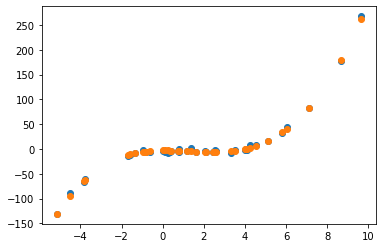

In [ ]:
plt.scatter(x_val, y_val)
plt.scatter(x_val,y_pred)


# **Best Degree of Polynomial using Cross-validation**

Read the dataset ***poly*** and split into train and validation sets.

Select a max degree value for the polynomial model.

For each degree:
> Perform k-fold cross validation


> Fit a polynomial regression model for each degree on the training data and predict on the validation data. Ensure fit_intercept=False in the linear regression model.


  

Compute the train, validation and cross-validation error as MSE values and store them in separate lists.

Print the best degree of the model for both validation and cross-validation approaches.

Plot the train and cross-validation errors for each degree.




In [ ]:
# Your code here
deg = 10
train_error = [] 
val_error = []
train_mse_list = []
test_mse_list = []
for i in range(deg):
    x_train_poly = PolynomialFeatures(degree = i).fit_transform(x_train)
    x_poly_val = PolynomialFeatures(degree = i).fit_transform(x_val)
    lreg = LinearRegression(fit_intercept=False)
    lreg.fit(x_train_poly, y_train)
    y_train_pred = lreg.predict(x_train_poly)
    y_val_pred = lreg.predict(x_poly_val)
    mse = cross_validate(lreg, x, y, scoring = 'neg_mean_squared_error', cv = 5, return_train_score= True)
    test_mse = -1 * np.mean(mse['test_score'])
    train_mse = -1 * np.mean(mse['train_score'])
    train_mse_list.append(train_mse)
    test_mse_list.append(test_mse)
    train_error.append(mean_squared_error(y_train, y_train_pred))
    val_error.append(mean_squared_error(y_val, y_val_pred))
Min_Mse = min(val_error)
Degree = val_error.index(Min_Mse)
print("Best Degree = ",Degree)

The best degree of the model is 6


**Classification - Simple Logistic Regression.**

In [ ]:
# https://raw.githubusercontent.com/akmalatnamal/davlab8/main/IRIS.csv
# IRIS Dataset


The dataset used here is called the Iris dataset. This dataset has several features such as sepal length, sepal width based on which we predict which of the iris species that particular flower belongs to.


Read the IRIS.csv file into a pandas dataframe.

Assign the predictor and response variables. Remember the aim is to predict the iris species

Standardise the predictor variables using StandardScalar.

Split the dataset into train and validation sets, with 80% of the data for training

Fit a logistic regression model to the dataset

Compute and print the train and validation accuracy

Perform 10 fold cross-validation. Compute and print the accuracy.

In [ ]:
# Your code here


